# Assignment 2 - Lending Loans Exploratory Analysis

This notebook contains Exploratory data analysis for both approved and declined Loans.

This notebook contains the following section:
### 1. Importing required libraries.
### 2. Data loading into dataframes.
### 3. Data Exploration.

####  Analysis of Approved Loans
+ Analysis on Loan Amount.
    + Loan amount frequency distribution.
    + Number of Loans over time.
    + Average Loan Amount over time
    + Relationship between Loan Amount and Loan status.
    + Distributin of Loan Amount over Purpose
+ Analysis on Interest Rate.
    + Interest Rate Distribution
    + Relationsip between Interest Rate and Term.
    + Relationsip between Interest Rate and sub-grade.
    + Interest Rates over time.
        
#### Analysis of Rejected loans and it's relation with Approved Loans.
Questions we are trying to answer in our analysis.
+ No of rejects over time? Increase/Decrease?
+ DTI ratio of people getting most rejected loans and accepted loan.
+ States where there are most rejected loans.
+ Does Employment length has to do something with rejection of loans?
+ Frequency plot for Employment Length
+ Based on the employment length, What is the appropiate loan amount people should apply for?
+ No. of loans for each employment length.
+ Relationship of Amount requested and employment length?

---

# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
import matplotlib.pyplot as plt
from matplotlib import style
from functools import partial
from operator import is_not
import gc
import seaborn as sns
%matplotlib inline
style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Garbage collector (optional)
gc.collect()

0

## Data Loading

Creating data frames *all_data* and *all_data_declined* for aceepted and declined loans.

In [2]:
all_data = pd.read_csv('Cleaned_all_data.csv',encoding = 'iso-8859-1')
all_data_declined = pd.read_csv('Cleaned_all_data_declined.csv')

**First, for our own convenience lets make issue_d as Index of the dataframe.
Then, change the format to datetime so that we can sort the columns.**

In [3]:
### accepted loans
# setting issue_d as index
all_data.set_index('issue_d', inplace=True)
all_data_declined.set_index('Application Date', inplace=True)

# changing index (issue_d) to datetime (date-month-year-time) so that we can sort it
all_data.index = pd.to_datetime(all_data.index)
all_data_declined.index = pd.to_datetime(all_data_declined.index)

# sorting the columns
all_data.sort_index(axis=1, inplace=True)
all_data_declined.sort_index(axis=1, inplace=True)

# Data Exploration

** In the below section, we will get an intution of the various important features and will visualize their behavious over time and relationship with other features.**

## 1. Loan amount

### 1.1 Loan amount frequency distribution
**Plot frequency dstribution histogram and Boxplot for Loan Amount**

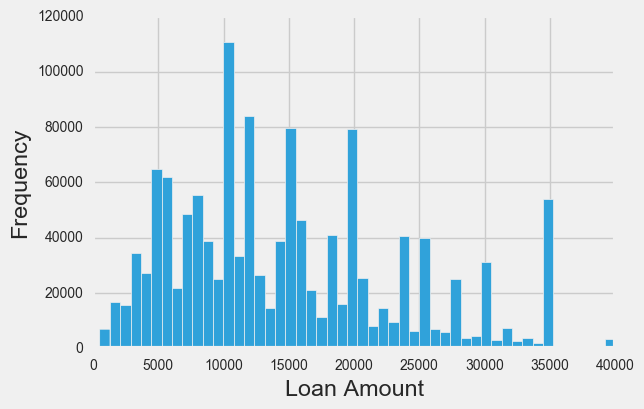

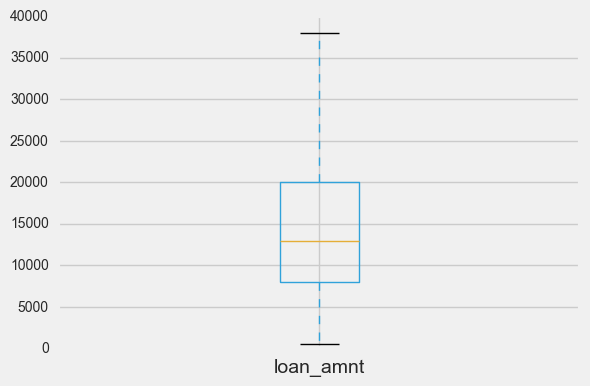

In [4]:
all_data['loan_amnt'].hist(bins=50)
plt.ylabel('Frequency')
plt.xlabel('Loan Amount')
plt.show()
q = all_data.boxplot(column='loan_amnt')

**Observation**:
The above histogram shows us the distribution of loan amount and we can observe that the maximum loan amounts are in the range of 7000 to 20000.

This can be confirmed from the boxplot above that most of the loan amount is in the said range.

### 1.2 Number of Loans over time.

** To get an intution of how many loans were taken over the years. **

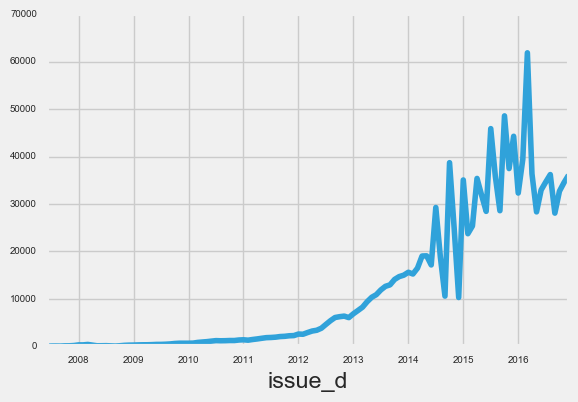

In [8]:
totalloans_bytime = all_data.groupby(all_data.index)['zip_code'].count()
totalloans_bytime.plot(kind='line', fontsize=7)

### 1.3 Average Loan Amount over time

**As we saw above that the number of loans taken over the years varies, hence it makes sense to visualize the *average* loan amount over the years. **

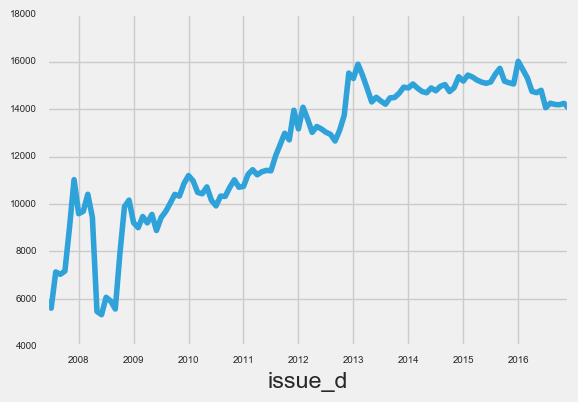

In [10]:
loan_amnt_bytime = all_data.groupby(all_data.index)['loan_amnt'].mean()
loan_amnt_bytime.plot(kind='line', fontsize=7)

**Observation:** We can observe from the above graph that the average loan amount has been generally increasing over time. It dipped in 2008 that seems to be due to financial crisis because the economy was bad and no one had moneyto take any loans.

### 1.4 Relationship between Loan Amount and Loan status.

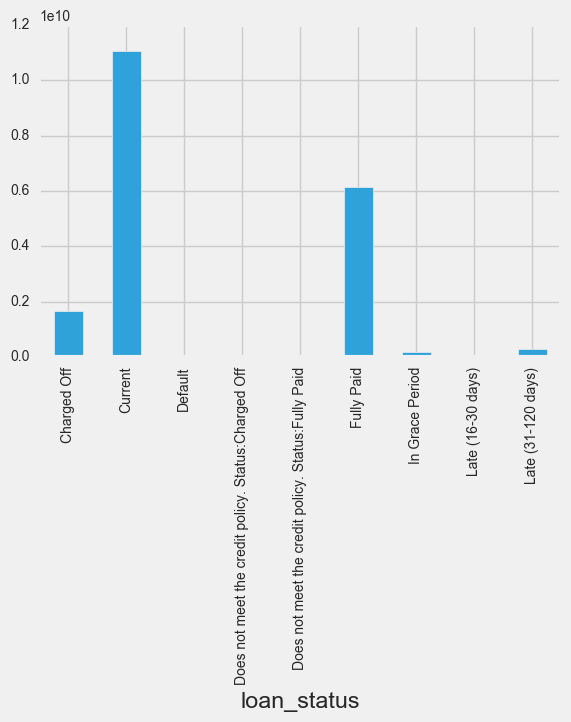

In [11]:
loan_amnt_status = all_data.groupby('loan_status')['loan_amnt'].sum()
loan_amnt_status.plot(kind='bar')

### 1.5 Distributin of Loan Amount over Purpose

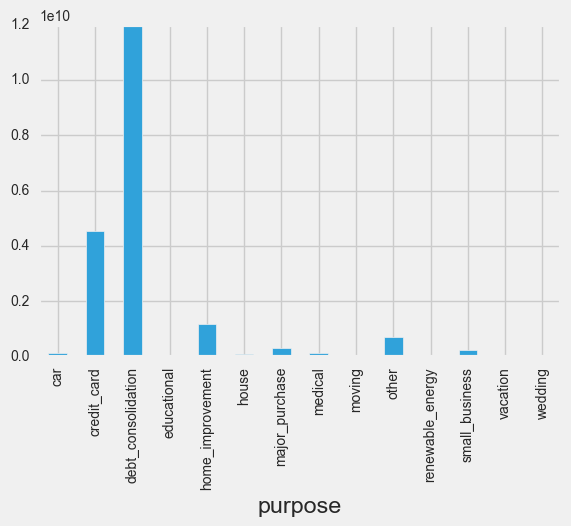

In [12]:
loan_amnt_purpose = all_data.groupby('purpose')['loan_amnt'].sum()
loan_amnt_purpose.plot(kind='bar')

**Observation:** We can observe from the above graph that most of the loans are for Debt Consolidation purpose.

## 2. Interest Rate

### 2.1 Interest Rate Distribution
**Plot the distribution of Interest rate on a box plot to get some insights.**

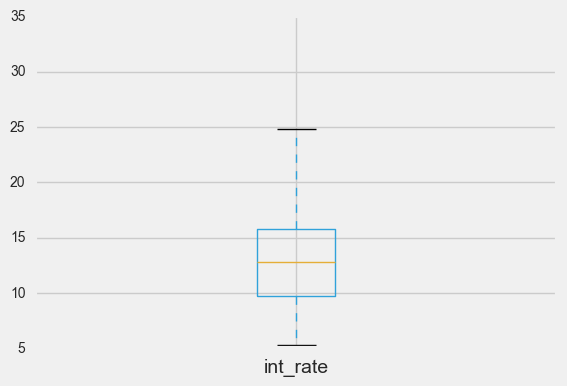

In [13]:
a = all_data.boxplot(column='int_rate')

**Observation**: The above graph shows us that most of the loans are given in the interest range of 10% to 15%.
Does Interest rate depends on any other factor? Let's find out below.

### 2.2 Relationsip between Interest Rate and Term

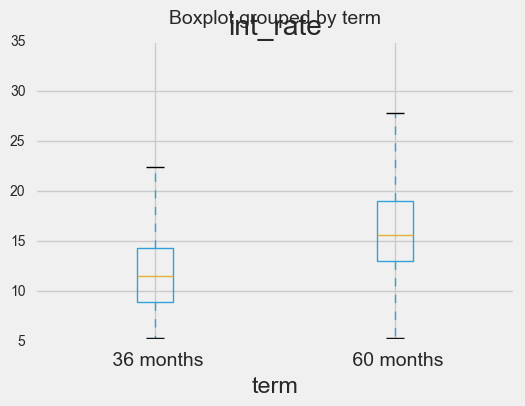

In [14]:
w = all_data.boxplot(column='int_rate', by='term')

**Observation**: As suspected, we can see in the above plot that interest rates are dependent on the term of loan.

 i.e. 36 months loans have int rate between 10% to 15%, whereas 60 months loan have higher int rate range of ~13% to 19%

### 2.3 Relationsip between Interest Rate and sub-grade

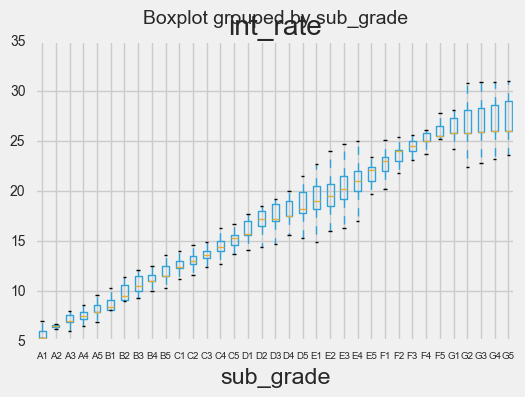

In [136]:
e = all_data.boxplot(column='int_rate', by='sub_grade', fontsize=7)

**Observation:** Kind of an obvious observation but it solidifies the claim that *interest rates* are very evenly and strictly differentiated on the basis of *Grade* and *Sub Grade*.

### 2.4. Interest Rates over time
Let's find out what was the average interest rate from 2007 to 2016.

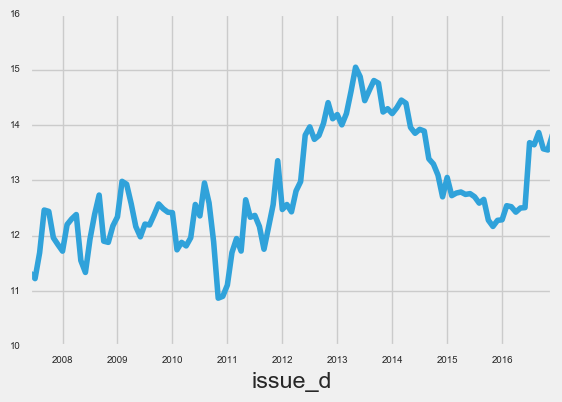

In [125]:
int_rate_bytime = all_data.groupby(all_data.index)['int_rate'].mean()
int_rate_bytime.plot(kind='line', fontsize=7)

**Observation:** The above line graph gives us the intution of the average interest rate over time.

We can observe that the interest rate were the lowest in 2010 Q4 and peaked between 2013 and 2014.

---
# Declined Loans

#### Check the data.

In [6]:
all_data_declined.head()

,Amount Requested,Debt-To-Income Ratio,Employment Length,Loan Title,Policy Code,Risk_Score,State,Unnamed: 0,Zip Code
Application Date,,,,,,,,,
2007-05-26,1000.0,10.00,4 years,Wedding Covered but No Honeymoon,0,693.0,NM,0,481xx
2007-05-26,1000.0,10.00,< 1 year,Consolidating Debt,0,703.0,MA,1,010xx
2007-05-27,11000.0,10.00,1 year,Want to consolidate my debt,0,715.0,MD,2,212xx
2007-05-27,6000.0,38.64,< 1 year,waksman,0,698.0,MA,3,017xx
2007-05-27,1500.0,9.43,< 1 year,mdrigo,0,509.0,MD,4,209xx


## Questions we are trying to answer in our analysis.
+ No of rejects over time? Increase/Decrease?
+ DTI ratio of people getting most rejected loans and accepted loan.
+ States where there are most rejected loans.
+ Does Employment length has to do something with rejection of loans?
    + Frequency plot for *Employment Length*
+ Based on the *employment length*, What is the appropiate loan amount people should apply for?
    + No. of loans for each employment length.
    + Relationship of *Amount requested* and *employment length*?
    
We will go through each of them one by one.

## No. of Rejects over time.

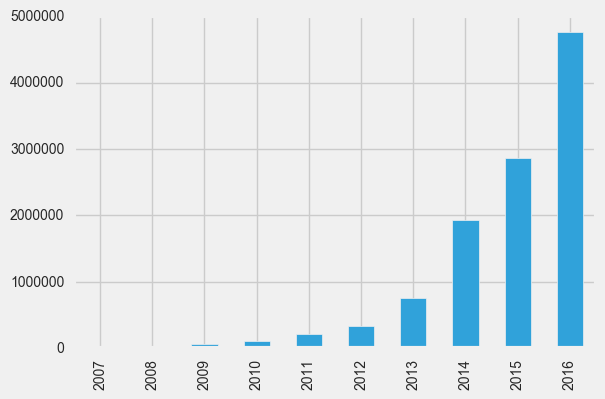

In [7]:
rejects = all_data_declined.groupby(all_data_declined.index.year)['Amount Requested'].count()
rejects.plot(kind='bar')

**Observation:** As we have been observing in accepted loans file, it is true in rejected files too that the number of loan entries in lending loan dataset has incresed overtime.

## Debt to Income Ratio 
Below we compare the dti ratio between accepted and rejected loans. We will do a side by side comparison to get an idea of the difference between them.

**Calculate the top 20 DTI ratio of accepted and rejected loans. And then plot them.**

In [72]:
dti_accepted_100 = all_data['dti'].sort_values(ascending = False)[1:20]
dti_rejected_100 = all_data_declined['Debt-To-Income Ratio'].sort_values(ascending = False)[1:20]

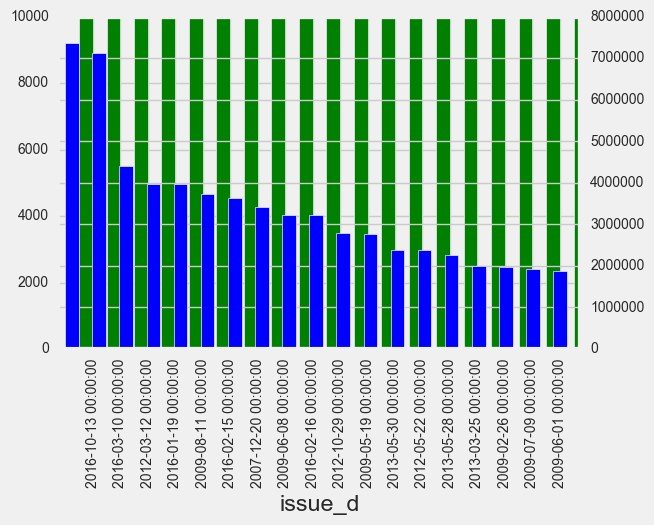

In [74]:
# DTI ratio of people getting most rejected loans.
fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()
dti_accepted_100.plot(kind='bar',color='green',ax = ax, position = 1)
dti_rejected_100.plot(kind='bar',color = 'blue', ax = ax2, position = 2)
ax.set_ylabel= ('accepted loans')
ax2.set_ylabel=('rejected loans')
plt.show()

**Observation:** In the above graph, blue bars represent top 20 accepted loans dti ratio and green bars represent top 20 rejected loans dti ratio. We can observe that the DTI ratio of the rejected loans is significantly higher than accepted loans. Thus, we can make a conclusion that it is the major cause of rejection of loan applications.

## States and Accepted/Rejected Loans

Taking our analysis on rejected loans further, we analyze the distribution of rejected loans across state and try to visualize if there are particular states where loans are more rejected than another.

Plotting top 10 states having maximum number of rejected loans.

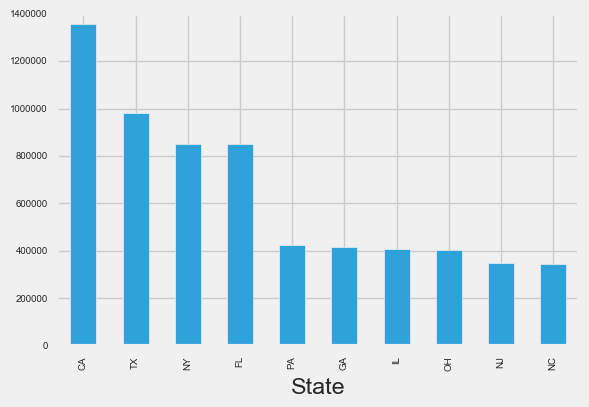

In [87]:
rr = all_data_declined.groupby('State')['Zip Code'].count().sort_values(ascending=False)[0:10]
rr.plot(kind='bar', fontsize=7)

Plotting top 10 states having maximum number of accepted loans.

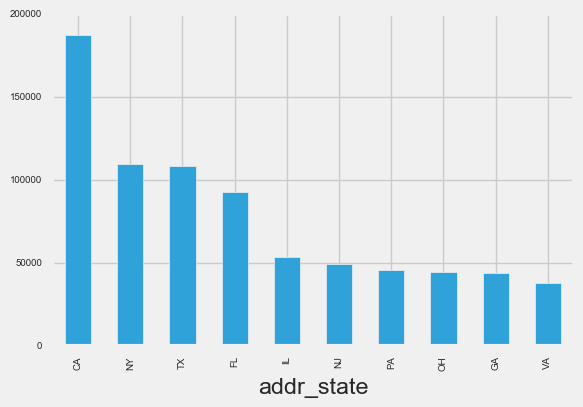

In [89]:
tt = all_data.groupby('addr_state')['id'].count().sort_values(ascending=False)[0:10]
tt.plot(kind='bar', fontsize=7)

## Relationship between Employment length and rejection of loans?

Let's plot the number of rejected loans per Employment length.

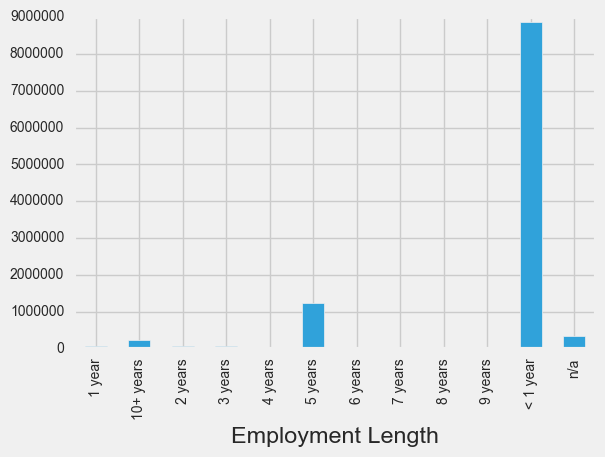

In [94]:
pp = all_data_declined.groupby('Employment Length')['Zip Code'].count()
pp.plot(kind='bar')

**Observation:** We can clearly observe from the above plot that Employment length has direct corelation with loan rejection. More than 90 percent of the loans are rejected when the applicant has less than 1 year of employment. 

## Relationship of Amount requested and employment length?

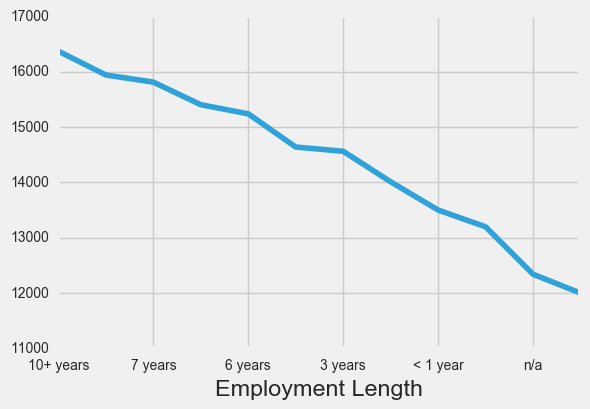

In [101]:
ii = all_data_declined.groupby('Employment Length')['Amount Requested'].mean().sort_values(ascending=False)
ii.plot(kind='line')

**Observation:** From the above graph we conclude that there is no direct relation between Employment length and Loan Amount. Average Loan amount requested is higher if the employment length is higher.